## ЛАБОРАТОРНАЯ №2

# 1. Аналитическое вычисление характеристик

## 1.1. Определение распределения
Плотность вероятности задана как:
$$f(x) = x e^{-x}, \quad \text{для } x > 0$$
Сравнивая с общей формулой Гамма-распределения $X \sim \Gamma(\alpha, \beta)$:
$$f(x; \alpha, \beta) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} e^{-\beta x}$$
Устанавливаю соответсвие между параметрами и формулай, которая на дана:
* **Параметр формы** $\alpha = 2$
* **Параметр масштаба** $\beta = 1$

## 1.2. Аналитические формулы
Для $X \sim \Gamma(\alpha, \beta)$ характеристики определяются так:
1. $\mathbb{E}[X] = \frac{\alpha}{\beta}$
2. $\text{Var}(X) = \frac{\alpha}{\beta^2}$
3. $\mathbb{E}[X^2] = \text{Var}(X) + (\mathbb{E}[X])^2$

## 1.3. Результаты
Подставляем $\alpha=2$ и $\beta=1$:
| $\theta$ | $E[\xi] = 2/\theta$ | $D[\xi] = 2/\theta^2$ | $E[\xi^2] = 6/\theta^2$ |
| :--- | :--- | :--- | :--- |
| **0.5** | $4$ | $8$ | $24$ |
| **2.0** | $1$ | $0.5$ | $1.5$ |
| **8.0** | $0.25$ | $0.03125$ | $0.09375$ |

### Моделирование и визуализация

#### Импорт библиотек и определение констант

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Включаем отображение графиков в ноутбуке
%matplotlib inline

# --- Параметры ---

THETAS = [0.5, 2.0, 8.0]

K_VALUES = np.arange(24, 216)

ANALYTICAL_VALS = {
    0.5: {'mean': 4.0, 'var': 8.0, 'mean_sq': 24.0},
    2.0: {'mean': 1.0, 'var': 0.5, 'mean_sq': 1.5},
    8.0: {'mean': 0.25, 'var': 0.03125, 'mean_sq': 0.09375}
}

ALPHA_SHAPE = 2

### Запуск моделирования и построение графиков

Мы будем итерировать по каждому значению `theta`. Для каждого `theta` мы:
1.  Создадим списки для хранения оценок.
2.  Пройдемся в цикле по всем размерам выборки `k` из `K_VALUES`.
3.  Для каждого `k` сгенерируем выборку `sample`.
    * `np.random.gamma` использует параметры `shape` (форма, $\alpha$) и `scale` (масштаб, $1/\beta$). В нашем случае `shape=2` и `scale=1/theta`.
4.  Рассчитаем три оценки:
    * Оценка $E[\xi]$: выборочное среднее (`np.mean(sample)`).
    * Оценка $D[\xi]$: несмещенная выборочная дисперсия (`np.var(sample, ddof=1)`).
    * Оценка $E[\xi^2]$: среднее от квадратов элементов выборки (`np.mean(sample**2)`).
5.  Построим три графика, показывающих сходимость оценок к истинным значениям.


--- Обработка для θ = 0.5 ---


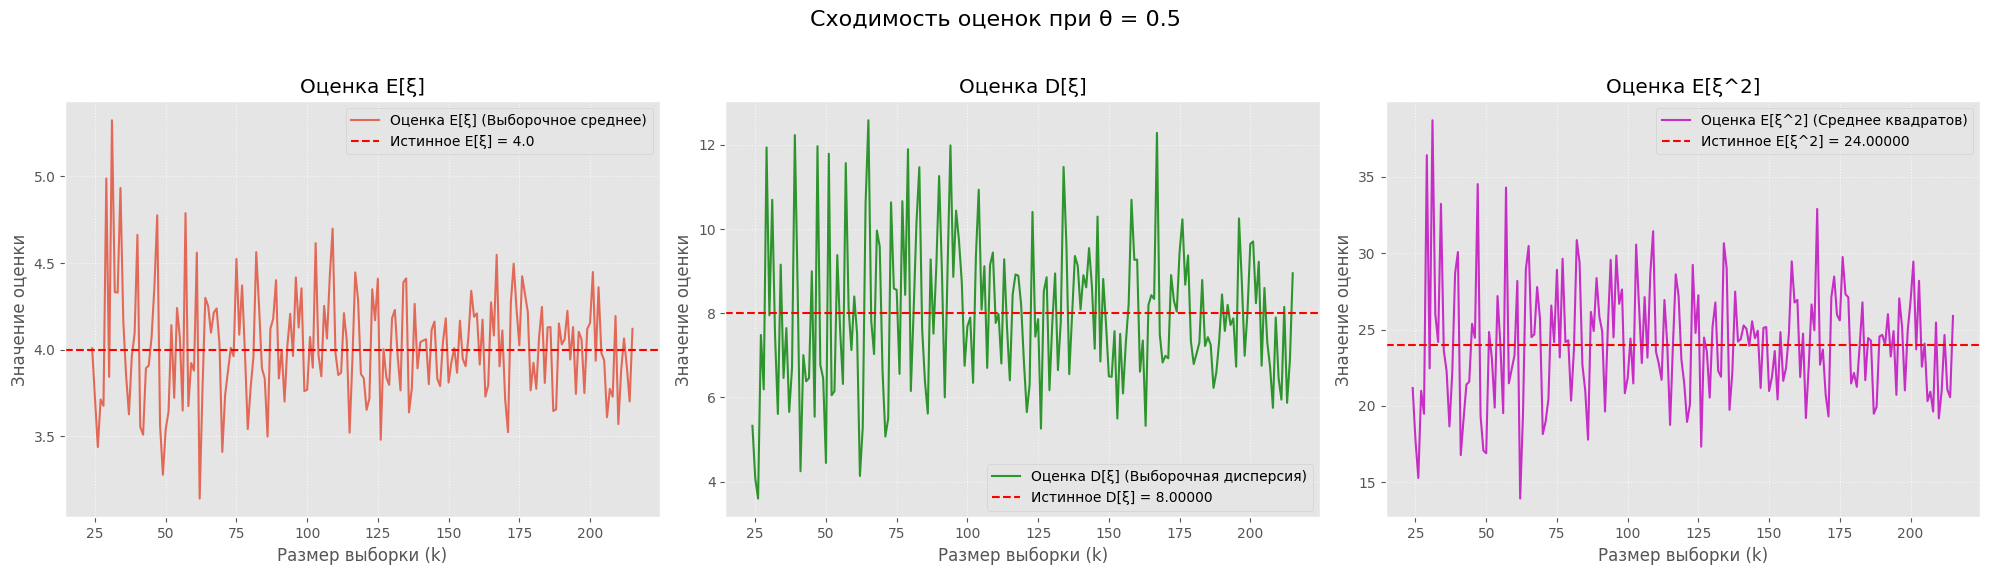


--- Обработка для θ = 2.0 ---


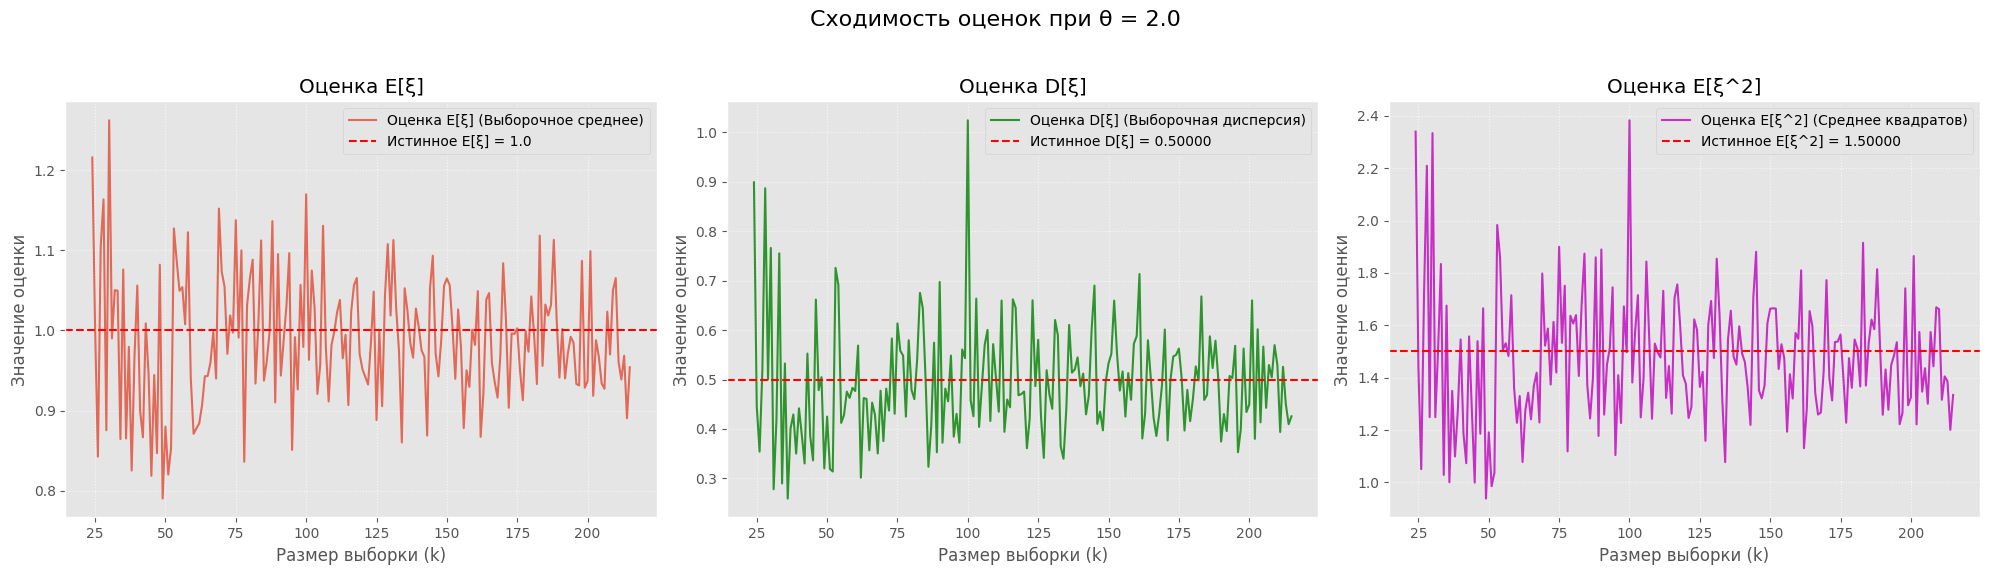


--- Обработка для θ = 8.0 ---


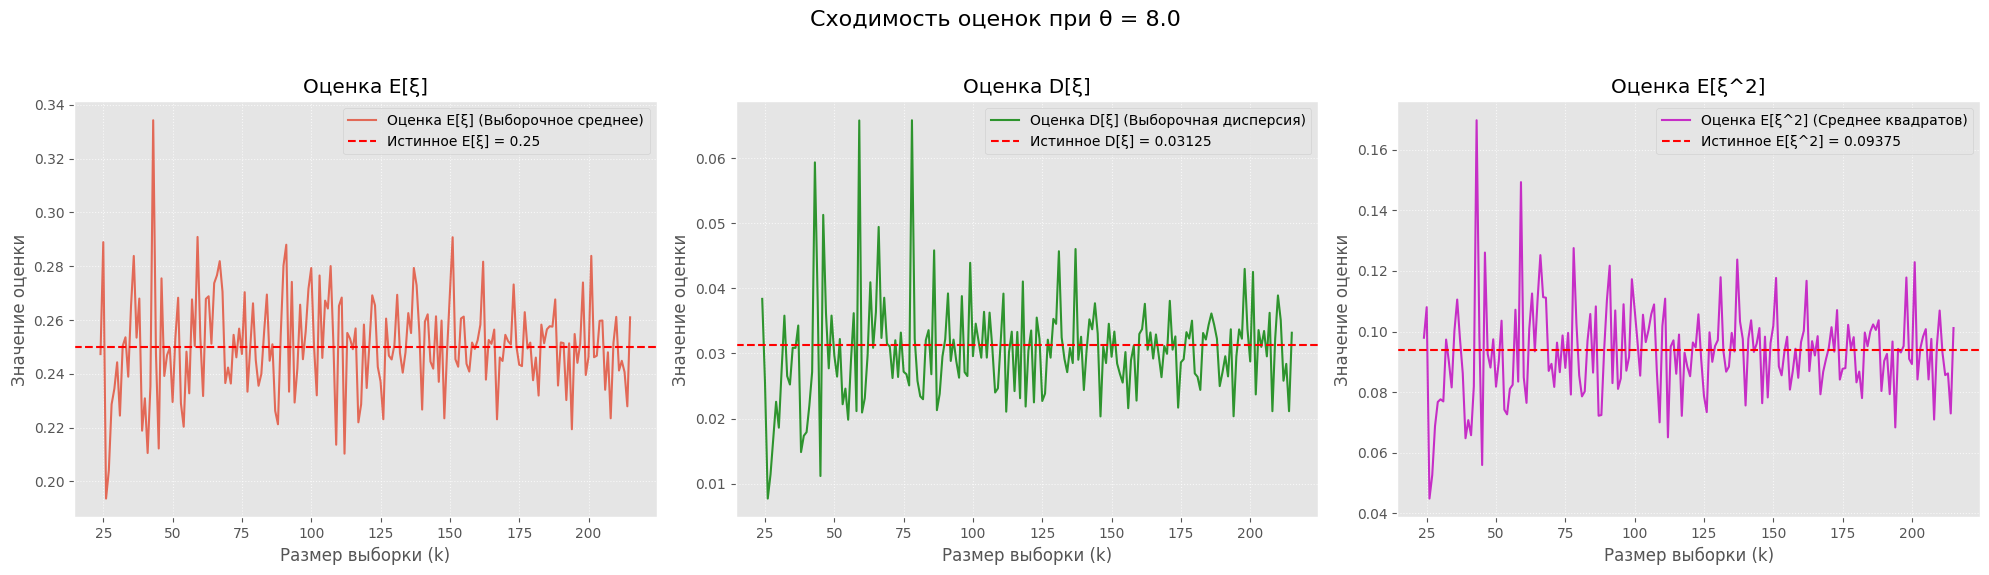

In [ ]:
plt.style.use('ggplot')

for theta in THETAS:
    print(f"\n--- Обработка для θ = {theta} ---")
    
    analytical = ANALYTICAL_VALS[theta]
    
    estimates_mean = []
    estimates_var = []
    estimates_mean_sq = []

    beta_scale = 1.0 / theta
    
    # Цикл по размерам выборок
    for k in K_VALUES:
        sample = np.random.gamma(shape=ALPHA_SHAPE, scale=beta_scale, size=k)
        
        # 2. Считаем оценки
        est_mean = np.mean(sample)
        est_var = np.var(sample, ddof=1) # ddof=1 для несмещенной оценки S^2
        est_mean_sq = np.mean(sample**2) # Оценка E[ξ^2]
        
        # 3. Сохраняем оценки
        estimates_mean.append(est_mean)
        estimates_var.append(est_var)
        estimates_mean_sq.append(est_mean_sq)
        
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
    fig.suptitle(f'Сходимость оценок при θ = {theta}', fontsize=16)
    
    ax1.plot(K_VALUES, estimates_mean, label='Оценка E[ξ] (Выборочное среднее)', alpha=0.8)
    ax1.axhline(y=analytical['mean'], color='r', linestyle='--', 
                label=f"Истинное E[ξ] = {analytical['mean']}")
    ax1.set_xlabel('Размер выборки (k)')
    ax1.set_ylabel('Значение оценки')
    ax1.set_title('Оценка E[ξ]')
    ax1.legend()
    ax1.grid(True, linestyle=':', alpha=0.7)
    
    ax2.plot(K_VALUES, estimates_var, label='Оценка D[ξ] (Выборочная дисперсия)', alpha=0.8, color='g')
    ax2.axhline(y=analytical['var'], color='r', linestyle='--', 
                label=f"Истинное D[ξ] = {analytical['var']:.5f}")
    ax2.set_xlabel('Размер выборки (k)')
    ax2.set_ylabel('Значение оценки')
    ax2.set_title('Оценка D[ξ]')
    ax2.legend()
    ax2.grid(True, linestyle=':', alpha=0.7)
    

    ax3.plot(K_VALUES, estimates_mean_sq, label='Оценка E[ξ^2] (Среднее квадратов)', alpha=0.8, color='m')
    ax3.axhline(y=analytical['mean_sq'], color='r', linestyle='--', 
                label=f"Истинное E[ξ^2] = {analytical['mean_sq']:.5f}")
    ax3.set_xlabel('Размер выборки (k)')
    ax3.set_ylabel('Значение оценки')
    ax3.set_title('Оценка E[ξ^2]')
    ax3.legend()
    ax3.grid(True, linestyle=':', alpha=0.7)
    
    # Показываем все 3 графика
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Конечно, вот решение для второй задачи, также разбитое по ячейкам для Jupyter Notebook.

Ячейка 1 (Тип: Markdown)
Markdown

# Задача 2: Смещенное экспоненциальное распределение

Дана плотность $f_{\xi}(x) = \lambda e^{-\lambda(x-a)}$ при $x \ge a$, и $0$ иначе.
Параметры: $(\lambda, a) = (2, 2)$.

---

## (a) Аналитические вычисления

### 1. Мода (Mode)

Мода — это значение $x$, при котором функция плотности $f_{\xi}(x)$ максимальна.
Функция $f(x) = 2e^{-2(x-2)}$ является монотонно убывающей для $x \ge 2$.
Следовательно, ее максимальное значение достигается в начальной точке, $x=a$.

**Мода = $a = 2$**

### 2. Математическое ожидание ($E[\xi]$)

Данная случайная величина $\xi$ — это стандартная экспоненциальная величина $\eta \sim \text{Exp}(\lambda)$, сдвинутая на $a$.
То есть, $\xi = \eta + a$.
Мы знаем, что $E[\eta] = 1/\lambda$.
Используя свойство линейности математического ожидания:
$E[\xi] = E[\eta + a] = E[\eta] + a = \frac{1}{\lambda} + a$.

$E[\xi] = \frac{1}{2} + 2 = 2.5$

**Математическое ожидание = 2.5**

### 3. Медиана ($Me$)

Медиана $m$ — это значение, для которого $P(\xi \le m) = 0.5$.
Нам нужно решить интеграл:
$$\int_{a}^{m} \lambda e^{-\lambda(x-a)} dx = 0.5$$
$$\int_{2}^{m} 2 e^{-2(x-2)} dx = 0.5$$

Выполним интегрирование:
$$\left[ -e^{-2(x-2)} \right]_{2}^{m} = 0.5$$
$$\left( -e^{-2(m-2)} \right) - \left( -e^{-2(2-2)} \right) = 0.5$$
$$-e^{-2(m-2)} + e^0 = 0.5$$
$$1 - e^{-2(m-2)} = 0.5$$
$$e^{-2(m-2)} = 0.5$$

Возьмем натуральный логарифм от обеих частей:
$$-2(m-2) = \ln(0.5)$$
$$-2(m-2) = -\ln(2)$$
$$m-2 = \frac{\ln(2)}{2}$$
$$m = 2 + \frac{\ln(2)}{2}$$

$m \approx 2 + \frac{0.693147}{2} \approx 2 + 0.34657$

**Медиана $\approx 2.3466$**

## (b) Две выборки

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

LAMBDA = 2.0
A_SHIFT = 2.0
N_LARGE = 10000
N_SMALL = 20

MODE_ANALYTICAL = A_SHIFT
MEAN_ANALYTICAL = (1 / LAMBDA) + A_SHIFT
MEDIAN_ANALYTICAL = A_SHIFT + (np.log(2) / LAMBDA)

print("--- (a) Аналитические значения ---")
print(f"Мода:     {MODE_ANALYTICAL:.4f}")
print(f"Мат. ож.: {MEAN_ANALYTICAL:.4f}")
print(f"Медиана:  {MEDIAN_ANALYTICAL:.4f}")
print("-" * 30)


SCALE = 1.0 / LAMBDA

sample_large = np.random.exponential(scale=SCALE, size=N_LARGE) + A_SHIFT
sample_small = np.random.exponential(scale=SCALE, size=N_SMALL) + A_SHIFT

mean_est_large = np.mean(sample_large)
median_est_large = np.median(sample_large)
mode_est_large = np.min(sample_large)

# Расчет оценок для маленькой выборки
mean_est_small = np.mean(sample_small)
median_est_small = np.median(sample_small)
mode_est_small = np.min(sample_small)

print("--- (b) Оценки по БОЛЬШОЙ выборке (n=10000) ---")
print(f"Оценка моды:     {mode_est_large:.4f}")
print(f"Оценка мат. ож.: {mean_est_large:.4f}")
print(f"Оценка медианы:  {median_est_large:.4f}")
print("-" * 30)

print("--- (b) Оценки по МАЛЕНЬКОЙ выборке (n=20) ---")
print(f"Оценка моды:     {mode_est_small:.4f}")
print(f"Оценка мат. ож.: {mean_est_small:.4f}")
print(f"Оценка медианы:  {median_est_small:.4f}")
print("-" * 30)

--- (a) Аналитические значения ---
Мода:     2.0000
Мат. ож.: 2.5000
Медиана:  2.3466
------------------------------
--- (b) Оценки по БОЛЬШОЙ выборке (n=10000) ---
Оценка моды:     2.0000
Оценка мат. ож.: 2.5006
Оценка медианы:  2.3521
------------------------------
--- (b) Оценки по МАЛЕНЬКОЙ выборке (n=20) ---
Оценка моды:     2.0074
Оценка мат. ож.: 2.5805
Оценка медианы:  2.4017
------------------------------


## (c) Визуализация

Теперь построим 4 графика в сетке 2x2:

1.  **Верхний левый**: Гистограмма **большой** выборки + **ОЦЕНКИ** (выборочные).
2.  **Верхний правый**: Гистограмма **маленькой** выборки + **ОЦЕНКИ** (выборочные).
3.  **Нижний левый**: Гистограмма **большой** выборки + **АНАЛИТИЧЕСКИЕ** (истинные) значения и теоретическая ФПР.
4.  **Нижний правый**: Гистограмма **маленькой** выборки + **АНАЛИТИЧЕСКИЕ** (истинные) значения и теоретическая ФПР.

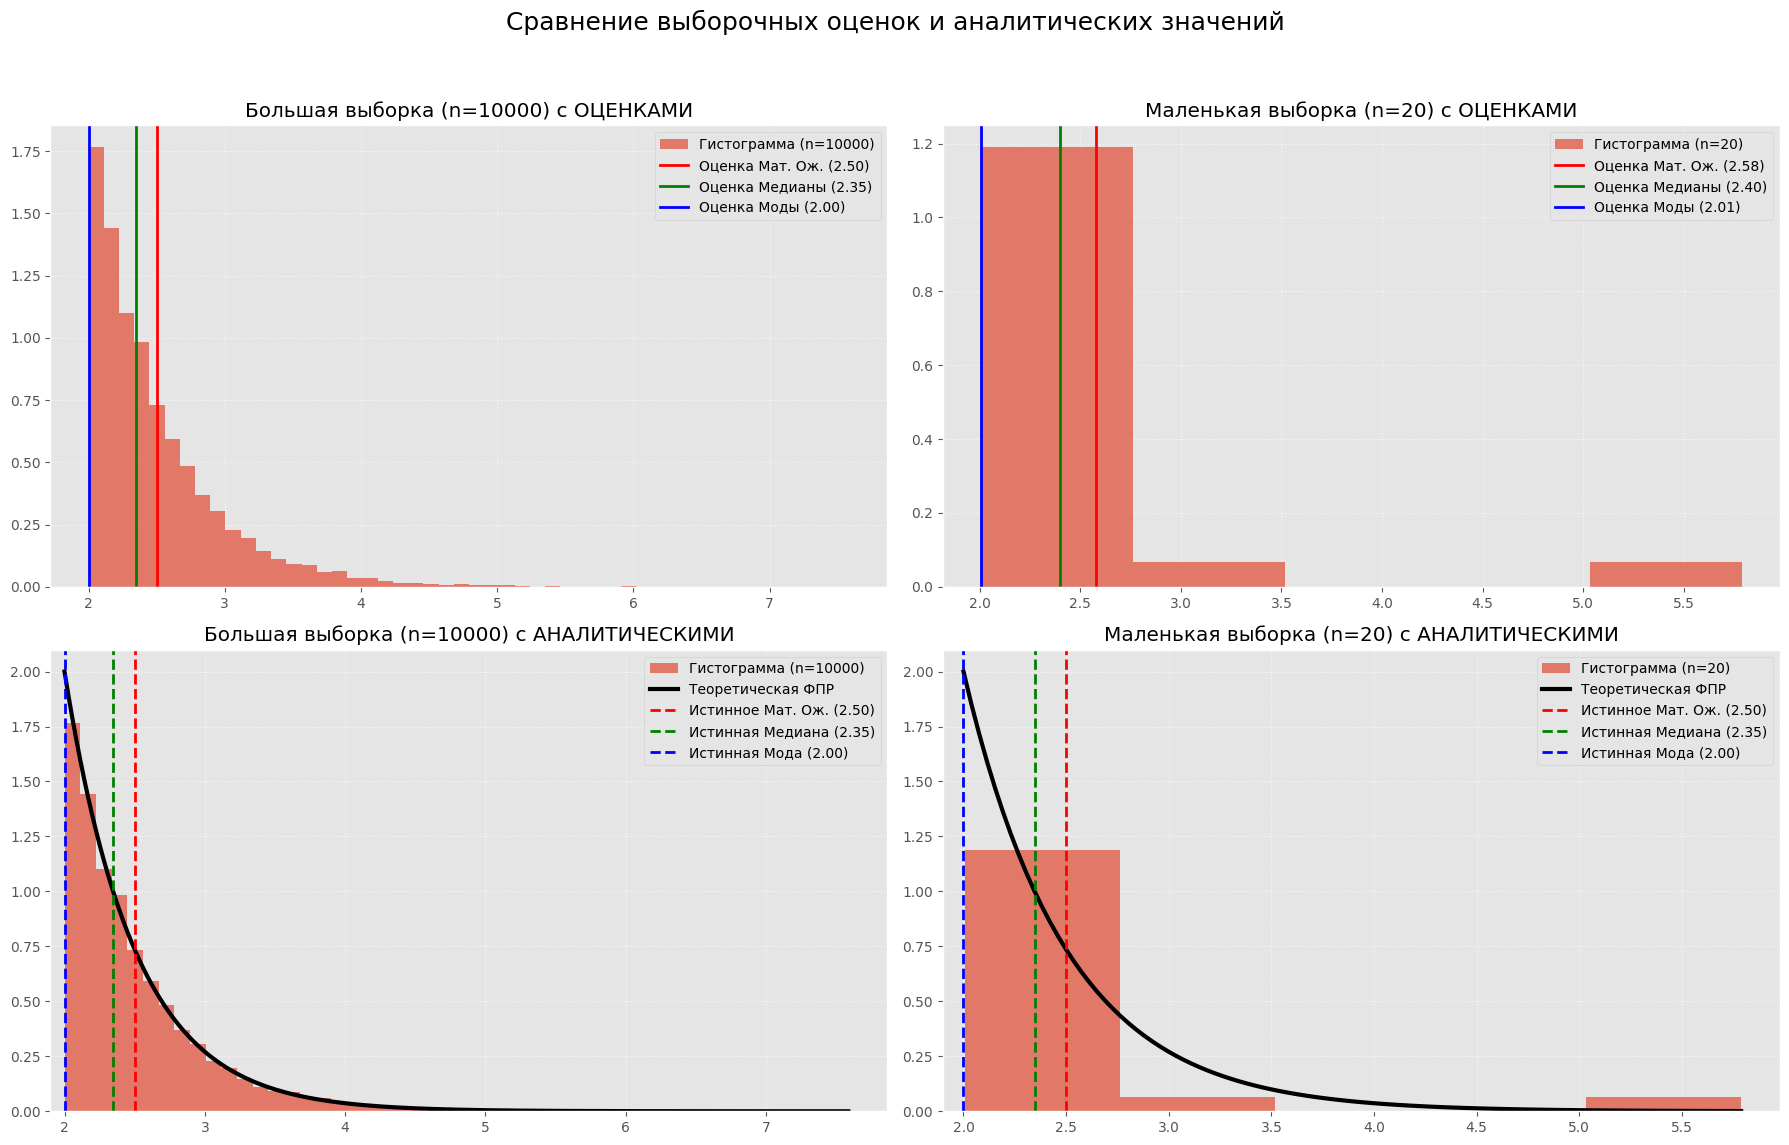

In [ ]:
plt.style.use('ggplot')
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Сравнение выборочных оценок и аналитических значений', fontsize=18)

# --- 1. БОЛЬШАЯ выборка + ОЦЕНКИ ---
ax = axes[0, 0]
ax.hist(sample_large, bins=50, density=True, alpha=0.7, label='Гистограмма (n=10000)')
ax.axvline(mean_est_large, color='r', linestyle='-', lw=2, label=f'Оценка Мат. Ож. ({mean_est_large:.2f})')
ax.axvline(median_est_large, color='g', linestyle='-', lw=2, label=f'Оценка Медианы ({median_est_large:.2f})')
ax.axvline(mode_est_large, color='b', linestyle='-', lw=2, label=f'Оценка Моды ({mode_est_large:.2f})')
ax.set_title('Большая выборка (n=10000) с ОЦЕНКАМИ')
ax.legend()
ax.grid(True, linestyle=':', alpha=0.7)

ax = axes[0, 1]
bins_small = max(5, int(np.sqrt(N_SMALL))) 
ax.hist(sample_small, bins=bins_small, density=True, alpha=0.7, label='Гистограмма (n=20)')
ax.axvline(mean_est_small, color='r', linestyle='-', lw=2, label=f'Оценка Мат. Ож. ({mean_est_small:.2f})')
ax.axvline(median_est_small, color='g', linestyle='-', lw=2, label=f'Оценка Медианы ({median_est_small:.2f})')
ax.axvline(mode_est_small, color='b', linestyle='-', lw=2, label=f'Оценка Моды ({mode_est_small:.2f})')
ax.set_title('Маленькая выборка (n=20) с ОЦЕНКАМИ')
ax.legend()
ax.grid(True, linestyle=':', alpha=0.7)

ax = axes[1, 0]
ax.hist(sample_large, bins=50, density=True, alpha=0.7, label='Гистограмма (n=10000)')
# Строим теоретическую ФПР
x_pdf = np.linspace(A_SHIFT, sample_large.max(), 200)
y_pdf = LAMBDA * np.exp(-LAMBDA * (x_pdf - A_SHIFT))
ax.plot(x_pdf, y_pdf, 'k-', lw=3, label='Теоретическая ФПР')
ax.axvline(MEAN_ANALYTICAL, color='r', linestyle='--', lw=2, label=f'Истинное Мат. Ож. ({MEAN_ANALYTICAL:.2f})')
ax.axvline(MEDIAN_ANALYTICAL, color='g', linestyle='--', lw=2, label=f'Истинная Медиана ({MEDIAN_ANALYTICAL:.2f})')
ax.axvline(MODE_ANALYTICAL, color='b', linestyle='--', lw=2, label=f'Истинная Мода ({MODE_ANALYTICAL:.2f})')
ax.set_title('Большая выборка (n=10000) с АНАЛИТИЧЕСКИМИ')
ax.set_xlim(left=A_SHIFT - 0.1) # Устанавливаем начало оси X
ax.legend()
ax.grid(True, linestyle=':', alpha=0.7)

ax = axes[1, 1]
ax.hist(sample_small, bins=bins_small, density=True, alpha=0.7, label='Гистограмма (n=20)')
# Строим теоретическую ФПР
x_pdf = np.linspace(A_SHIFT, sample_small.max(), 100)
y_pdf = LAMBDA * np.exp(-LAMBDA * (x_pdf - A_SHIFT))
ax.plot(x_pdf, y_pdf, 'k-', lw=3, label='Теоретическая ФПР')
# Добавляем аналитические линии
ax.axvline(MEAN_ANALYTICAL, color='r', linestyle='--', lw=2, label=f'Истинное Мат. Ож. ({MEAN_ANALYTICAL:.2f})')
ax.axvline(MEDIAN_ANALYTICAL, color='g', linestyle='--', lw=2, label=f'Истинная Медиана ({MEDIAN_ANALYTICAL:.2f})')
ax.axvline(MODE_ANALYTICAL, color='b', linestyle='--', lw=2, label=f'Истинная Мода ({MODE_ANALYTICAL:.2f})')
ax.set_title('Маленькая выборка (n=20) с АНАЛИТИЧЕСКИМИ')
ax.set_xlim(left=A_SHIFT - 0.1)
ax.legend()
ax.grid(True, linestyle=':', alpha=0.7)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## (d) Анализ сходимости

**Вопрос:** Сходится ли медиана к математическому ожиданию?

**Ответ: Нет.**

Как видно из графиков и аналитических расчетов:
* **Истинное Математическое Ожидание = 2.5**
* **Истинная Медиана $\approx 2.3466$**

Это разные значения.

**Что мы наблюдаем:**
1.  **Закон больших чисел:** По мере увеличения размера выборки (с $n=20$ до $n=10000$):
    * **Выборочное среднее** (Оценка мат. ож.) сходится к **истинному мат. ожиданию** (2.5).
    * **Выборочная медиана** (Оценка медианы) сходится к **истинной медиане** (~2.3466).
    * **Выборочная мода** (Оценка моды, в нашем случае `min(sample)`) сходится к **истинной моде** (2.0).

2.  **Сравнение графиков:**
    * На графиках для **маленькой** выборки ($n=20$) выборочные оценки (сплошные линии) могут очень сильно "гулять" и не совпадать с истинными значениями (пунктирные линии).
    * На графиках для **большой** выборки ($n=10000$) выборочные оценки (сплошные линии) практически идеально совпадают с истинными (пунктирными).

**Вывод:** Медиана и математическое ожидание сходятся **к своим собственным истинным (аналитическим) значениям**, которые в случае асимметричных распределений (как это) не равны друг другу.

# 1.2 Моделирование совместного распределения двух СВ

## Шаг 1: Анализ таблицы распределения

Нам дана таблица совместного распределения. Давайте ее внимательно проанализируем.

| $\xi \setminus \eta$ | 1 | 2 | 3 | ... | $P(\xi=i)$ |
| :--- | :--- | :--- | :--- | :--- | :--- |
| **-2** | $C_{-2} \cdot \frac{1}{2^1}$ | $C_{-2} \cdot \frac{1}{2^2}$ | $C_{-2} \cdot \frac{1}{2^3}$ | ... | $C_{-2}$ |
| **1** | $C_{1} \cdot \frac{1}{2^1}$ | $C_{1} \cdot \frac{1}{2^2}$ | $C_{1} \cdot \frac{1}{2^3}$ | ... | $C_{1}$ |
| **2** | $C_{2} \cdot \frac{1}{2^1}$ | $C_{2} \cdot \frac{1}{2^2}$ | $C_{2} \cdot \frac{1}{2^3}$ | ... | $C_{2}$ |
| **$P(\eta=j)$** | $\frac{1}{2^1}$ | $\frac{1}{2^2}$ | $\frac{1}{2^3}$ | ... | **1** |

1.  **Форма ячеек:** Текст в задании (например, `5 21 5 22 5 23`) мы интерпретируем как $P(\xi=i, \eta=j) = \frac{C_i}{2^j}$.
    * $P(\xi=i, \eta=j) = P(\xi=i | \eta=j) \cdot P(\eta=j)$.
    * Или: $P(\xi=i, \eta=j) = P(\eta=j | \xi=i) \cdot P(\xi=i)$.

2.  **Маргинальное распределение $\eta$:**
    * $P(\eta=j) = \sum_{i \in \{-2, 1, 2\}} P(\xi=i, \eta=j) = \sum_{i} C_i \frac{1}{2^j} = \left(\sum_{i} C_i\right) \cdot \frac{1}{2^j}$.
    * Полная вероятность $\sum_{i,j} P(\xi=i, \eta=j) = \sum_{j=1}^{\infty} \left[ \left(\sum_{i} C_i\right) \cdot \frac{1}{2^j} \right]$
    * Сумма геометрической прогрессии $\sum_{j=1}^{\infty} (\frac{1}{2})^j = \frac{1/2}{1 - 1/2} = 1$.
    * Чтобы общая сумма вероятностей была равна 1, нам необходимо, чтобы $\sum_{i} C_i = 1$.

3.  **Маргинальное распределение $\xi$:**
    * $P(\xi=i) = \sum_{j=1}^{\infty} P(\xi=i, \eta=j) = \sum_{j=1}^{\infty} C_i \frac{1}{2^j} = C_i \sum_{j=1}^{\infty} (\frac{1}{2})^j = C_i \cdot 1 = C_i$.
    * Таким образом, константы $C_i$ — это просто маргинальные вероятности $P(\xi=i)$.

4.  **Независимость (Ключевой вывод):**
    * Мы видим, что $P(\xi=i, \eta=j) = C_i \cdot \frac{1}{2^j} = P(\xi=i) \cdot \frac{1}{2^j}$.
    * Мы также видим, что $P(\eta=j) = \left(\sum_{i} P(\xi=i)\right) \cdot \frac{1}{2^j} = 1 \cdot \frac{1}{2^j} = \frac{1}{2^j}$.
    * Следовательно, $P(\xi=i, \eta=j) = P(\xi=i) \cdot P(\eta=j)$.
    * **Случайные величины $\xi$ и $\eta$ являются независимыми.**

5.  **Уточнение $P(\xi=i)$:**
    * В тексте задачи есть числа `1/5`. Если мы предположим, что $P(\xi=-2) = P(\xi=1) = P(\xi=2) = 1/5$, то их сумма $3/5 \ne 1$. Это недопустимо.
    * Скорее всего, `1/5` — это опечатка, и имелось в виду, что $\xi$ принимает значения $\{-2, 1, 2\}$ **равновероятно**.
    * **Наше рабочее допущение:** $P(\xi=-2) = P(\xi=1) = P(\xi=2) = 1/3$.

**Итог:**
* $\xi$: $P(\xi=i) = 1/3$ для $i \in \{-2, 1, 2\}$.
* $\eta$: $P(\eta=j) = (1/2)^j$ для $j \in \{1, 2, 3, \dots\}$. (Это геометрическое распределение $\text{Geom}(p=0.5)$).
* $\xi$ и $\eta$ **независимы**.

In [6]:
import numpy as np

N_SAMPLES = 2_000_000 


XI_VALUES = [-2, 1, 2]
XI_PROBS = [1/3, 1/3, 1/3]

ETA_P = 0.5

sample_xi = np.random.choice(XI_VALUES, size=N_SAMPLES, p=XI_PROBS)

sample_eta = np.random.geometric(p=ETA_P, size=N_SAMPLES)

corr_matrix_approx = np.corrcoef(sample_xi, sample_eta)
print("--- Аналитический результат ---")
analytical_matrix = np.array([[1.0, 0.0], [0.0, 1.0]])
print(analytical_matrix)

print(f"\n--- Приближенный результат (n={N_SAMPLES}) ---")
print(corr_matrix_approx)
print("\n--- Сравнение характеристик (Выборка vs Аналитика) ---")
print(f"E[ξ]:  {np.mean(sample_xi):.4f} (Аналитически: {1/3:.4f})")
print(f"D[ξ]:  {np.var(sample_xi):.4f} (Аналитически: {26/9:.4f})")
print(f"E[η]:  {np.mean(sample_eta):.4f} (Аналитически: 2.0)")
print(f"D[η]:  {np.var(sample_eta):.4f} (Аналитически: 2.0)")

--- Аналитический результат ---
[[1. 0.]
 [0. 1.]]

--- Приближенный результат (n=2000000) ---
[[1.00000000e+00 3.15995059e-04]
 [3.15995059e-04 1.00000000e+00]]

--- Сравнение характеристик (Выборка vs Аналитика) ---
E[ξ]:  0.3337 (Аналитически: 0.3333)
D[ξ]:  2.8886 (Аналитически: 2.8889)
E[η]:  1.9997 (Аналитически: 2.0)
D[η]:  2.0015 (Аналитически: 2.0)
